In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import numpy.random as rnd
import pandas as pd
import pickle

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['agg.path.chunksize'] = 10000

# Lab 5

In [2]:
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
dict_higgs_hi = pickle.load(infile)
dict_higgs_hi.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [3]:
infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
dict_qcd_hi = pickle.load(infile2)
dict_qcd_hi.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [4]:
hhdf = pd.DataFrame(dict_higgs_hi)
hhdf #signal

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [5]:
hqdf = pd.DataFrame(dict_qcd_hi)
hqdf #background

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


Lab 5b. Explore the training data by addressing following questions:

1. Do all features provide discrimination power between signal and background?
2. Are there correlations among these features?
3. Compute expected discovery sensitivity by normalizing each sample appropriately.
4. Develop a plan to optimize the discovery sensitivity by applying selections to these features.

Here is my understanding of the various columns within the data:
    
    pT: (Transverse Momentum) Momentum perpendicular to the beam axis
    eta: (Pseudorapidity) Describes the angle of particle relative to beam axis.
    Phi: (Scattering Angle) Phi is the angle between x-axis and particle
    mass: particle mass
    KtDeltaR: the distance between the last 2 merged jet constituents
    ee2, ee3: energy correlation functions that relate to phase space, used to calculate d2
    d2: the observable for two-prong jet discrimination
    t1, t2, t3: Jets 1, 2, and 3 respectively
    t21: t2/t1
    t32: t3/t2
    angularity: specific orientation of one jet to another at a referenced angle (phi)
    ktdeltaR: the change in angle between each jet

This data set was taken by the LHC as they search for the standard Higgs boson model, using simulated data. The data for Higgs signals seem more extreme than the background signal,

We can plan to optimize our discovery sensitivity by introducing various thresholds, such as the pT of our observations being above a certain momentum value, say above 120 (Higgs bosons have high pT), and the constraint that our particles have to have a mass that is around 125 GeV.

Before that however, we should first discuss discrimination power within the data of both the background and signal, as well as correlations within the features. We can first talk about the correlations within the features. Within each column, there are various relationships between other columns. These relationships include:

1) phi, eta, and angularity - these all deal with the angular position between the particle, beam, and/or the x-axis.
2) t1, t2, t3 and t21, t32 - these are the values of the split jets and their quotients between t2 and t1, as well as between t3 and t2. 
3) d2 and ee2, ee3 - ee2 and ee3 are the energy correlation functions of the jets, which is used to calculate d2, the energy observable.
4) pt and mass - transverse momentum and mass go hand in hand as mass can be used to help calucate momentum.

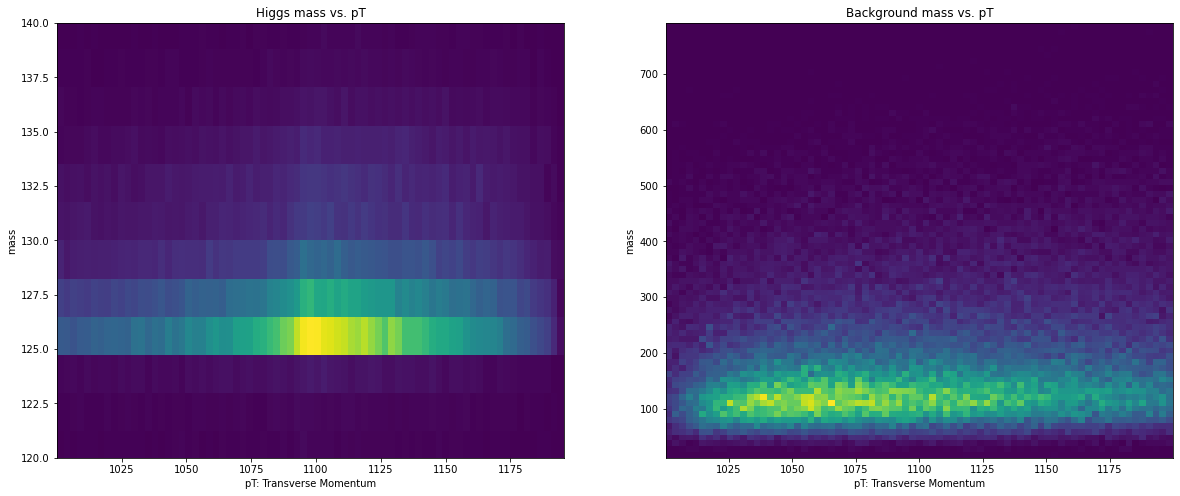

In [31]:
fig, ax = plt.subplots(1,2, figsize=[20,8])

ax[0].set_ylabel('mass')
ax[0].set_xlabel('pT: Transverse Momentum')
ax[0].set_title('Higgs mass vs. pT')
ax[0].hist2d(hhdf['pt'], hhdf['mass'], bins = 75)
ax[0].set_ylim(120,140)


ax[1].set_ylabel('mass')
ax[1].set_xlabel('pT: Transverse Momentum')
ax[1].set_title('Background mass vs. pT')
ax[1].hist2d(hqdf['pt'], hqdf['mass'], bins = 75)
#ax[1].set_ylim(80,160)

plt.show()

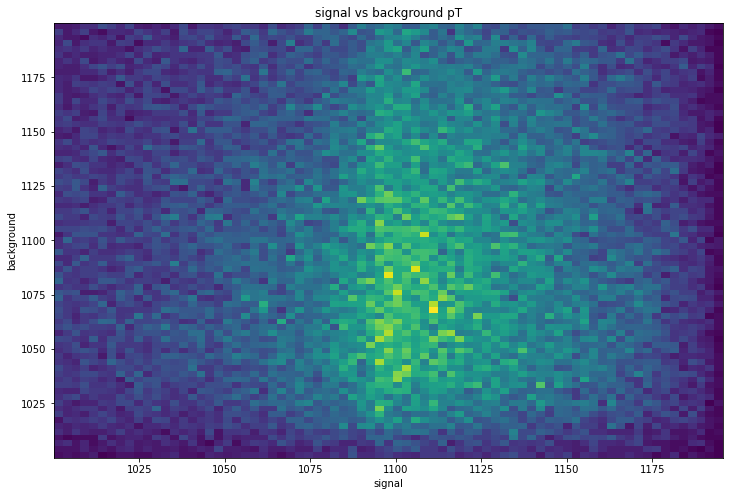

In [30]:
plt.hist2d(hhdf['pt'], hqdf['pt'], bins=75)
plt.title('signal vs background pT')
plt.xlabel('signal')
plt.ylabel('background')
plt.show()

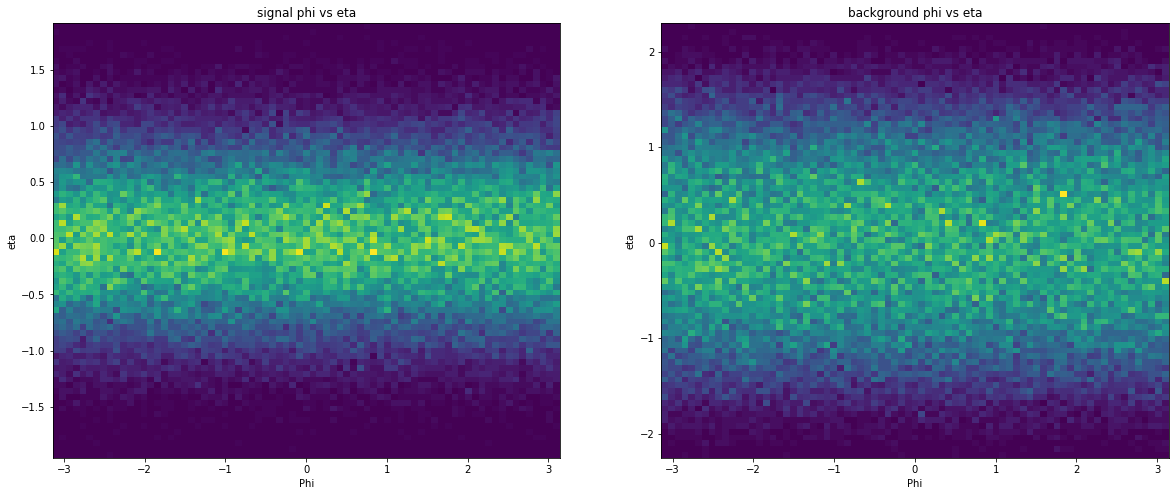

In [7]:
fig, ax = plt.subplots(1,2, figsize=[20,8])

ax[0].hist2d(hhdf['phi'], hhdf['eta'], bins = 75)
ax[0].set_xlabel('Phi')
ax[0].set_ylabel('eta')
ax[0].set_title('signal phi vs eta')

ax[1].hist2d(hqdf['phi'], hqdf['eta'], bins = 75)
ax[1].set_xlabel('Phi')
ax[1].set_ylabel('eta')
ax[1].set_title('background phi vs eta')
plt.show()

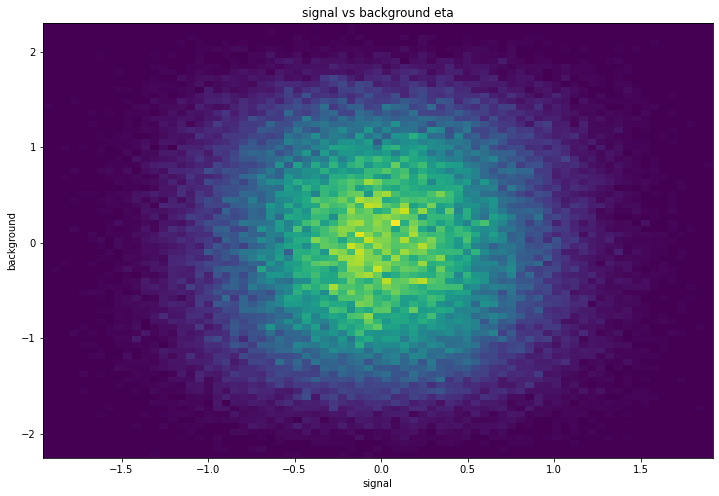

In [24]:
plt.hist2d(hhdf['eta'], hqdf['eta'], bins=75)
plt.title('signal vs background eta')
plt.xlabel('signal')
plt.ylabel('background')
plt.show()

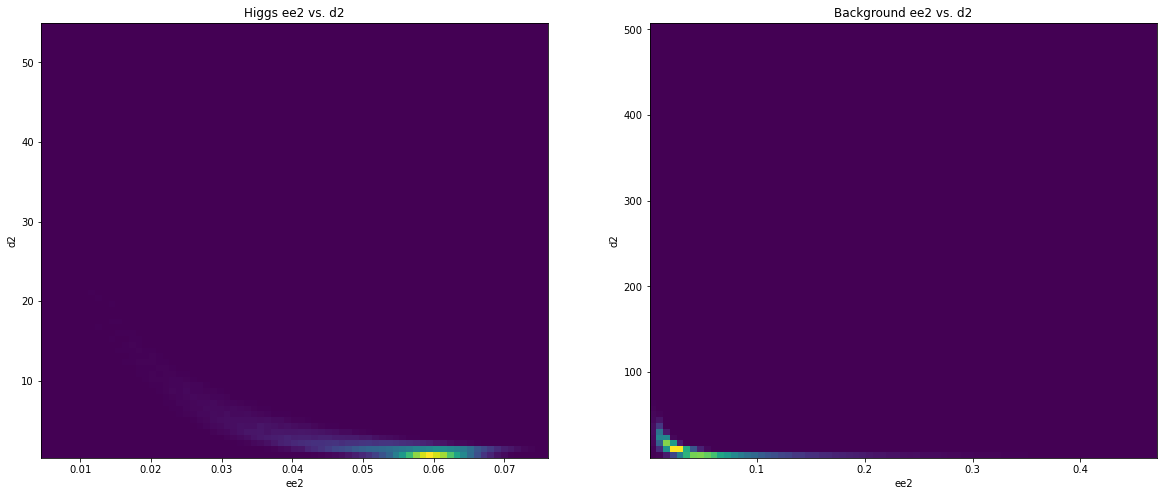

In [21]:
fig, ax = plt.subplots(1,2, figsize=[20,8])

ax[0].set_xlabel('ee2')
ax[0].set_ylabel('d2')
ax[0].set_title('Higgs ee2 vs. d2')
ax[0].hist2d(hhdf['ee2'], hhdf['d2'], bins = 75)
#ax[0].set_ylim(100,140)


ax[1].set_xlabel('ee2')
ax[1].set_ylabel('d2')
ax[1].set_title('Background ee2 vs. d2')
ax[1].hist2d(hqdf['ee2'], hqdf['d2'], bins = 75)
#ax[1].set_ylim(80,160)

plt.show()

Discrimination power, by definition, describes how evident the signal is being recorded over the background - in other words, if the signal's peak is greater than the background over certain intervals. This phenomenon within the data of both the background and the signal does exist, within features such as eta and pT, which both differ greatly at certain intervals, as seen in their respective one-dimensional histograms. In the pT graph, the signal overtakes the background between the pT readings of around 1075 to 1175. And in the eta graph, the signal tends to be noticeable when the eta is between measurements of about -.6 and .6. 

Inversely, some features do not have sufficient discrimination power, such as the d2 feature - the background overpowers the signal in that case.

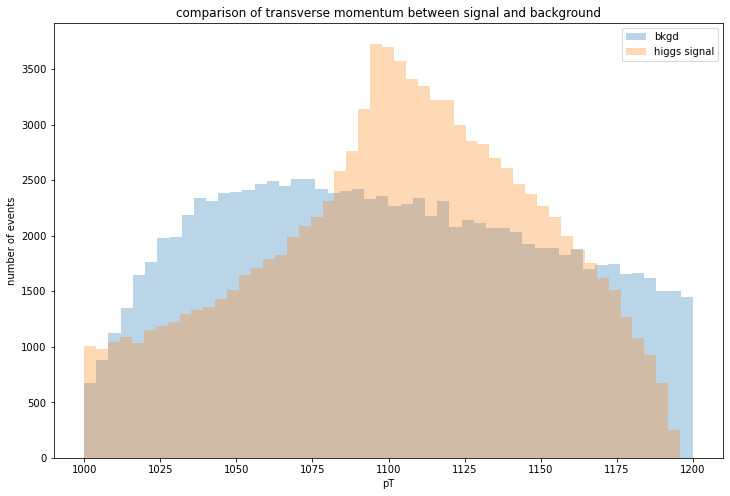

In [8]:
fig, ax = plt.subplots(1,1)

ax.hist(hqdf['pt'], alpha = 0.3, bins = 50, label = 'bkgd')
ax.hist(hhdf['pt'], alpha = 0.3, bins = 50, label = 'higgs signal')
ax.set_xlabel('pT')
ax.set_ylabel('number of events')
ax.set_title('comparison of transverse momentum between signal and background')
plt.legend()
plt.show()

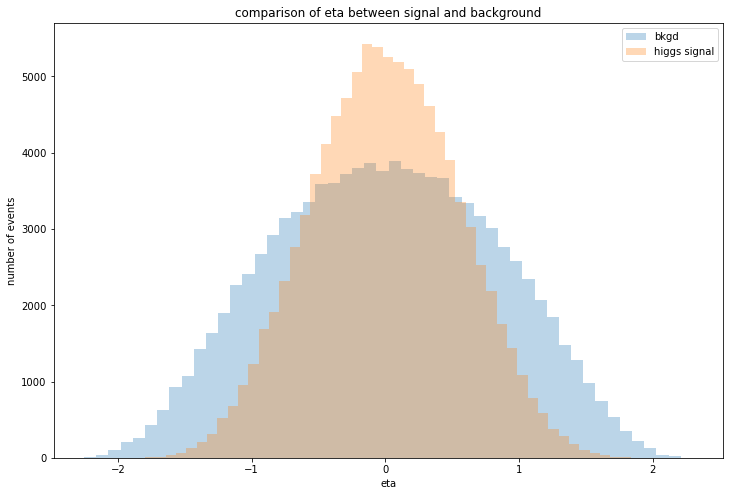

In [9]:
fig, ax = plt.subplots(1,1)

ax.hist(hqdf['eta'], alpha = 0.3, bins = 50, label = 'bkgd')
ax.hist(hhdf['eta'], alpha = 0.3, bins = 50, label = 'higgs signal')
ax.set_xlabel('eta')
ax.set_ylabel('number of events')
ax.set_title('comparison of eta between signal and background')
plt.legend()
plt.show()

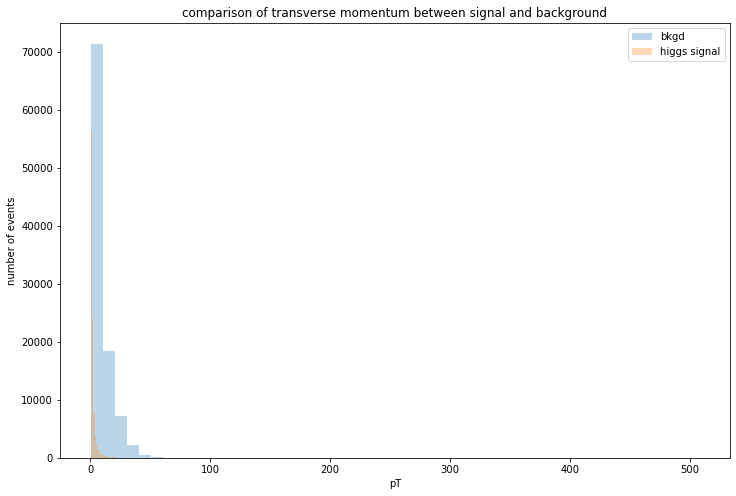

In [32]:
fig, ax = plt.subplots(1,1)

ax.hist(hqdf['d2'], alpha = 0.3, bins = 50, label = 'bkgd')
ax.hist(hhdf['d2'], alpha = 0.3, bins = 50, label = 'higgs signal')
ax.set_xlabel('pT')
ax.set_ylabel('number of events')
ax.set_title('comparison of transverse momentum between signal and background')
plt.legend()
plt.show()